In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [2]:
def three_body(x0:list,y0:list,vx0:list,vy0:list,m:list,dt:float=0.01,tstop:float=10):
    """
    Three body program. 
    Inputs: 
    Initial position:
    x0 = [x0 of mass 1,x0 of mass 2,x0 of mass 3], 
    y0 = [y01,y02,y03]
    
    Initial velocity:
    vx0 = [vx01,vx02,vx03], vy0 = [vy01,vy02,vy03]
    
    Mass:
    m [mass 1, mass 2, mass 3]
    
    dt:
    The elapsed time (in normalized units) between subsequent data points [default=0.01]
    
    tstop:
    How many time units to run the simulation for [default=10]
    """
    #Declare time array
    t = np.arange(0,tstop,dt) #[0,dt,2*dt,3*dt,...,tstop]
    
    #XCM = np.zeros_like(t)
    #YCM = np.zeros_like(t)
    #Create all of the arrays
    vx1 = np.zeros_like(t) #x velocity of mass 1
    vy1 = np.zeros_like(t) #y velocity of mass 1
    vx2 = np.zeros_like(t) #x velocity of mass 2
    vy2 = np.zeros_like(t) #...
    vx3 = np.zeros_like(t)
    vy3 = np.zeros_like(t)
    x1  = np.zeros_like(t) #x position of mass 1
    y1  = np.zeros_like(t)
    x2  = np.zeros_like(t)
    y2  = np.zeros_like(t)
    x3  = np.zeros_like(t)
    y3  = np.zeros_like(t)
    
    #Normalize masses if they arent already
    m = m / np.sum(m)
    
    #Initial conditions
    #Velocities
    vx1[0] = vx0[0]
    vy1[0] = vy0[0]
    vx2[0] = vx0[1]
    vy2[0] = vy0[1]
    vx3[0] = vx0[2]
    vy3[0] = vy0[2]
    #Positions
    x1[0]  = x0[0]
    y1[0]  = y0[0]
    x2[0]  = x0[1]
    y2[0]  = y0[1]
    x3[0]  = x0[2]
    y3[0]  = y0[2]
    
    
    #Start the actual loop
    for i in range(1,t.size):
        
        #Velocity derivatives
        dvx1 = ( #<-- Parentheses allow calculation to span lines, which is easier to read!
            -m[1] * (x1[i-1] - x2[i-1]) / np.hypot(x1[i-1]-x2[i-1],y1[i-1]-y2[i-1])**2 
            -m[2] * (x1[i-1] - x3[i-1]) / np.hypot(x1[i-1]-x3[i-1],y1[i-1]-y3[i-1])**2
        ) #<--Close parenthesis for dvx1 calculation
        
        dvy1 = ( 
            -m[1] * (y1[i-1] - y2[i-1]) / np.hypot(x1[i-1]-x2[i-1],y1[i-1]-y2[i-1])**2 
            -m[2] * (y1[i-1] - y3[i-1]) / np.hypot(x1[i-1]-x3[i-1],y1[i-1]-y3[i-1])**2
        )
        
        dvx2 = ( 
            -m[0] * (x2[i-1] - x1[i-1]) / np.hypot(x2[i-1]-x1[i-1],y2[i-1]-y1[i-1])**2 
            -m[2] * (x2[i-1] - x3[i-1]) / np.hypot(x2[i-1]-x3[i-1],y2[i-1]-y3[i-1])**2
        )
        dvy2 = ( 
            -m[0] * (y2[i-1] - y1[i-1]) / np.hypot(x2[i-1]-x1[i-1],y2[i-1]-y1[i-1])**2 
            -m[2] * (y2[i-1] - y3[i-1]) / np.hypot(x2[i-1]-x3[i-1],y2[i-1]-y3[i-1])**2
        )

        dvx3 = ( 
            -m[0] * (x3[i-1] - x1[i-1]) / np.hypot(x3[i-1]-x1[i-1],y3[i-1]-y1[i-1])**2 
            -m[1] * (x3[i-1] - x2[i-1]) / np.hypot(x3[i-1]-x2[i-1],y3[i-1]-y2[i-1])**2
        )
        dvy3 = ( 
            -m[0] * (y3[i-1] - y1[i-1]) / np.hypot(x3[i-1]-x1[i-1],y3[i-1]-y1[i-1])**2 
            -m[1] * (y3[i-1] - y2[i-1]) / np.hypot(x3[i-1]-x2[i-1],y3[i-1]-y2[i-1])**2
        )
        
        #Calculate velocity at t = i*dt
        vx1[i] = vx1[i-1] + dvx1 * dt
        vx2[i] = vx2[i-1] + dvx2 * dt
        vx3[i] = vx3[i-1] + dvx3 * dt
        
        #Euler-Cromer: Use velocity at time i to calculate postion at time i
        x1[i] = x1[i-1] + vx1[i] * dt
        x2[i] = x2[i-1] + vx2[i] * dt
        x3[i] = x3[i-1] + vx3[i] * dt
        
        vy1[i] = vy1[i-1] + dvy1 * dt
        vy2[i] = vy2[i-1] + dvy2 * dt
        vy3[i] = vy3[i-1] + dvy3 * dt
        
        y1[i] = y1[i-1] + vy1[i] * dt
        y2[i] = y2[i-1] + vy2[i] * dt
        y3[i] = y3[i-1] + vy3[i] * dt
                
    x = [x1,x2,x3]
    y = [y1,y2,y3]
    vx = [vx1,vx2,vx3]
    vy = [vy1,vy2,vy3]
    
    return vx,vy,x,y

def get_kinetic_energy(mass,vx,vy):
    mass = np.array(mass) / sum(mass)
    ke = np.zeros_like(vx[0])
    for i in range(len(vx)):
        print(i)
        ke = ke + 0.5 * mass[i] * (vx[i]**2 + vy[i]**2)
    return ke
def get_potential_energy(mass,x,y):
    #U = U12 + U13 + U23
    mass = np.array(mass) / sum(mass)
    r12 = np.hypot(x[0]-x[1],y[0]-y[1])
    r13 = np.hypot(x[0]-x[2],y[0]-y[2])
    r23 = np.hypot(x[1]-x[2],y[1]-y[2])
    U12 = -mass[0] * mass[1] / r12
    U13 = -mass[0] * mass[2] / r13
    U23 = -mass[1] * mass[2] / r23
    return (U12 + U13 + U23) 

def print_args():
    for i in range(3):
        print( "Mass {}".format(i+1))
        print("-"*10)
        print("Mass      = {:.2f} M".format(mass[i]/sum(mass) ) )
        print("(x0,y0)   = ({:.1f}, {:.1f})".format(x0[i],y0[i]))
        print("(vx0,vy0) = ({:.1f}, {:.1f})".format(vx0[i],vy0[i]))
        print()
def plot_initial_conditions(scale=1):
    plt.axvline(0,c='k')
    plt.axhline(0,c='k')
    mmass = np.array(mass) / sum(mass)
    sizemin = 10
    size = 500 * mmass
    size[size <sizemin] = sizemin
    ivx0 = np.array(vx0) * scale
    ivy0 = np.array(vy0) * scale
    for i in range(len(x0)):
        plt.scatter(x0[i],y0[i],zorder=i+3,s=size[i])
        arrow = plt.Arrow(x0[i],y0[i],ivx0[i],ivy0[i],color='C{}'.format(i),width=0.1*scale)
        plt.gca().add_artist(arrow)
    plt.xlim( min(x0)-np.abs(min(ivx0))-1,max(x0)+np.abs(max(ivx0))+1)
    plt.ylim( min(y0)-np.abs(min(ivy0))-1,max(y0)+np.abs(max(ivy0))+1)
    plt.gca().set_aspect('equal')

## Two circular orbits around central body

## Same orbit

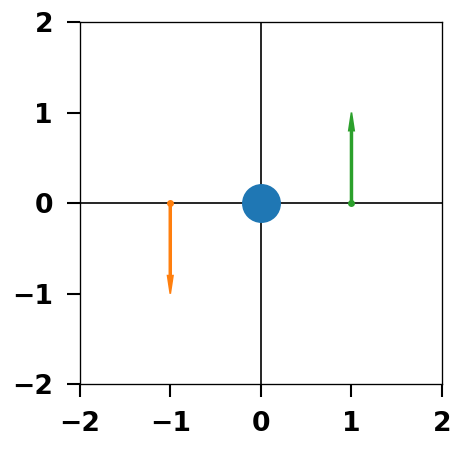

In [3]:
mass = [1000,1,1]
x0 = [0,-1,1]
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,-1,1]

plot_initial_conditions()

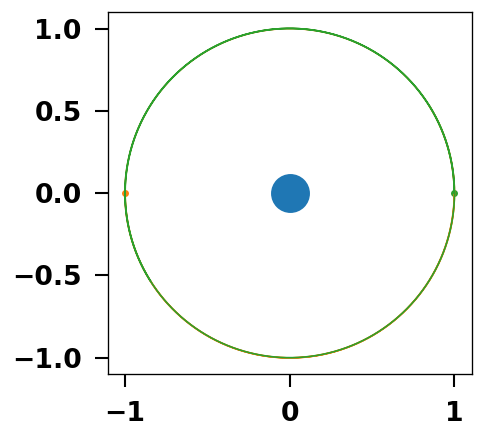

In [4]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=10,dt=0.001)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 500 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0],y[0][0],s=size[0])
plt.plot(x[0],y[0])
plt.scatter(x[1][0],y[1][0],s=size[1])
plt.plot(x[1],y[1])
plt.scatter(x[2][0],y[2][0],s=size[2])
plt.plot(x[2],y[2])
plt.gca().set_aspect('equal')

In [5]:
Video("three_body_solarsystem1.mp4")

## Different Orbits

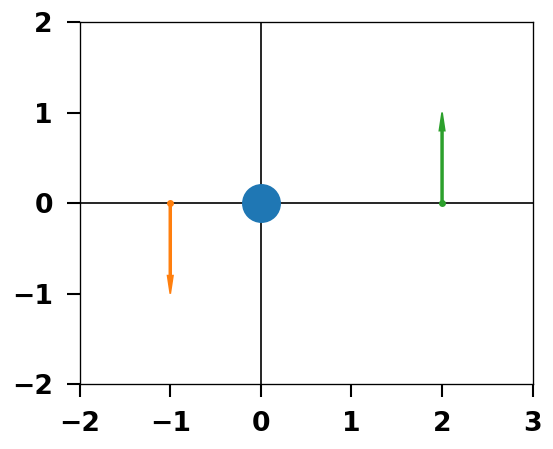

In [5]:
mass = [1000,1,1]
x0 = [0,-1,2]
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,-1,1]
plot_initial_conditions()

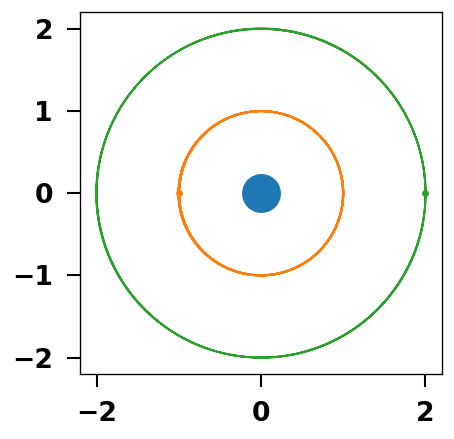

In [6]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=50,dt=0.01)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 500 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0],y[0][0],s=size[0])
plt.plot(x[0],y[0])
plt.scatter(x[1][0],y[1][0],s=size[1])
plt.plot(x[1],y[1])
plt.scatter(x[2][0],y[2][0],s=size[2])
plt.plot(x[2],y[2])
plt.gca().set_aspect('equal')

In [8]:
Video("three_body_solarsystem2.mp4")

## Massive outer planet

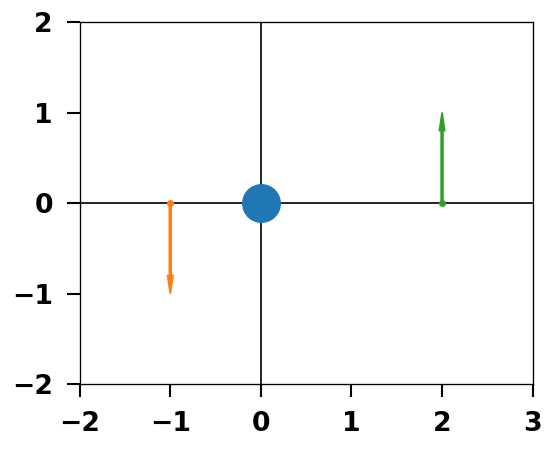

In [9]:
mass = [1000,1e-4,1]
x0 = [0,-1,2]
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,-1,1]
plot_initial_conditions()

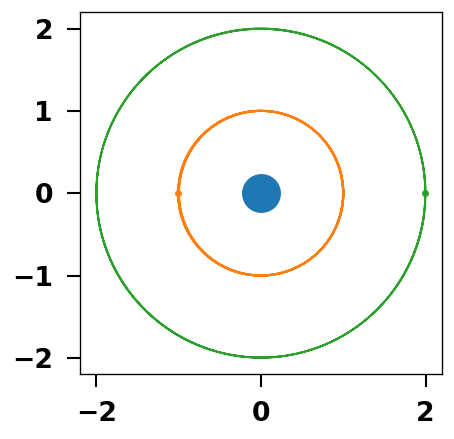

In [10]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=50,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 500 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')

## Less massive central body

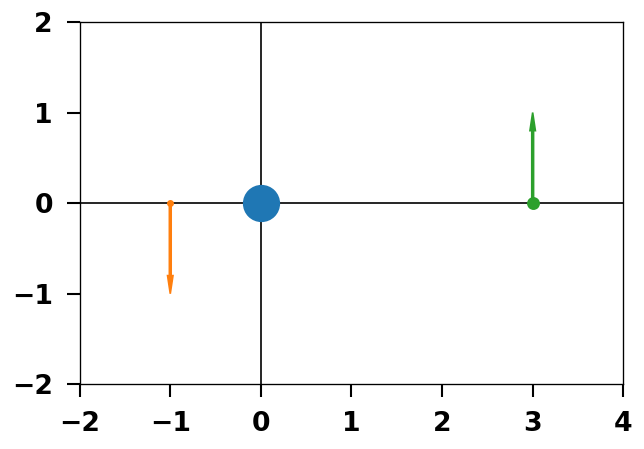

In [11]:
mass = [10,1e-4,1]
x0 = [0,-1,3]
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,-1,1]
plot_initial_conditions()

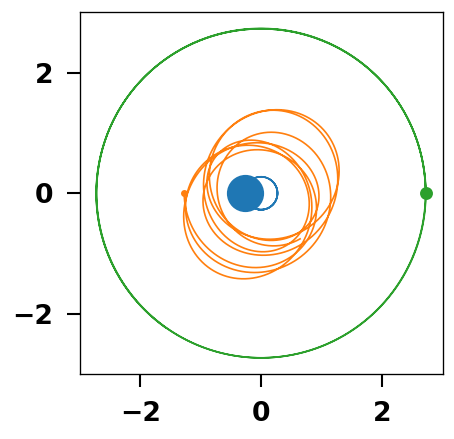

In [12]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=50,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 500 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')

In [13]:
Video("three_body_solarsystem3.mp4")

## Massive central body, elliptical inner orbit

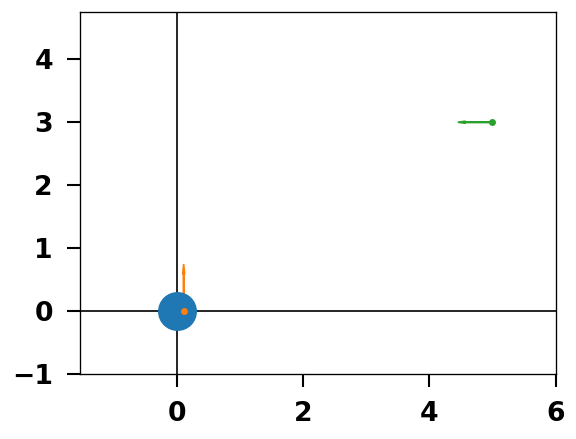

In [26]:
mass = [10_000_000,2,1e-2]
x0 = [0,0.1,5]
y0 = [0,0,3]
vx0 = [0,0,-1.1]
vy0 = [0,1.5,0]
#vx0 = [0,0,-1.0/np.sqrt(y0[-1])]
#vy0 = [0,1.0/np.sqrt(x0[1]),0]
plot_initial_conditions(scale=.5)

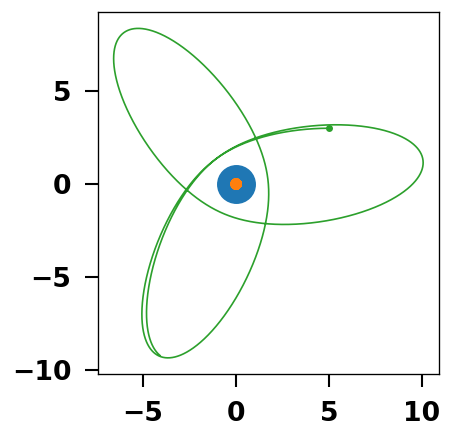

In [28]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=100,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 500 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')

In [16]:
Video("three_body7.mp4")

## Resonance

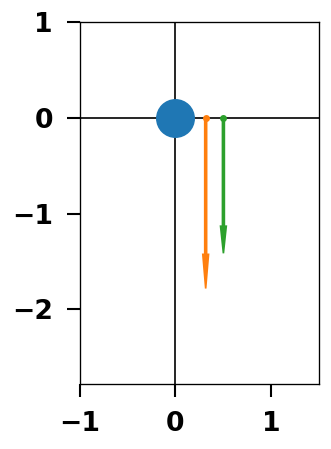

In [17]:
mass = [10000,1e-10,1]
x0 = [0,None,0.5]
x0[1] = x0[-1] / 4**(1/3)
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,-1/np.sqrt(x0[1]),-1/np.sqrt(x0[-1])]
plot_initial_conditions()

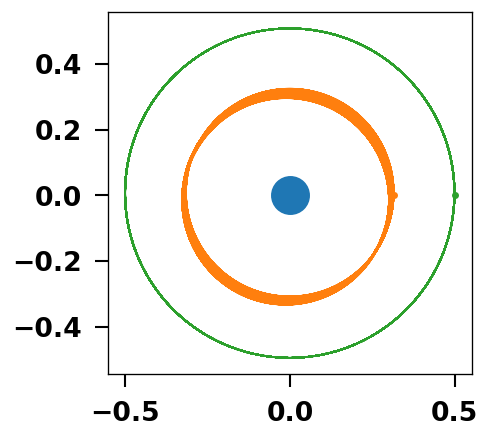

In [18]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=200,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 500 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')

In [19]:
Video("three_body_resonance1.mp4")

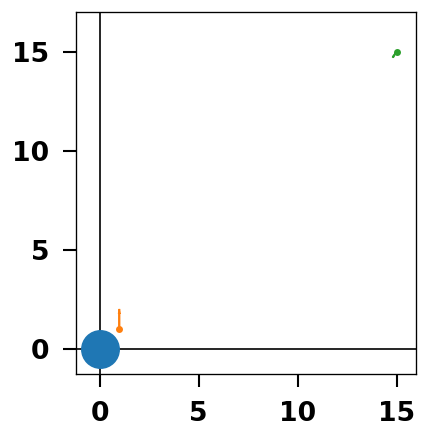

In [43]:
mass = [1000,1,0.001]
x0 = [0,1,15]
y0 = [0,1,15]
vx0 = [0,0,-0.2]
vy0 = [0,1,-0.3]
plot_initial_conditions()

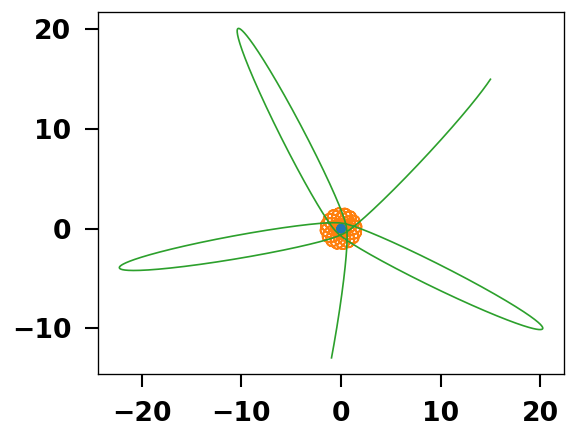

In [47]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=200,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 50 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
#plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')

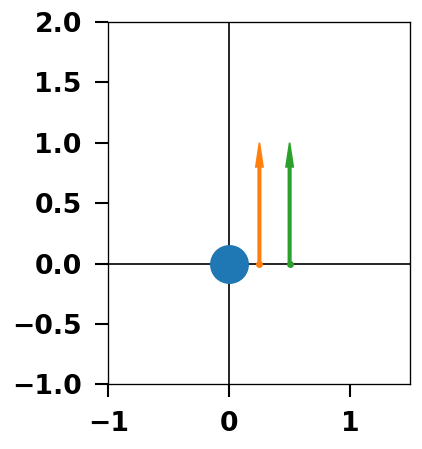

In [63]:
mass = [100000,.1,100]
x0 = [0,0.25,.5]
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,1,1]
plot_initial_conditions()

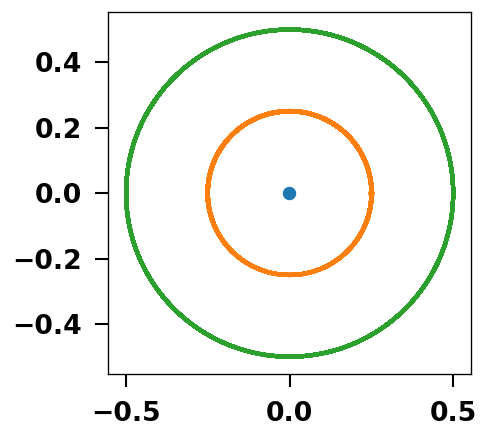

In [65]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=1000,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 50 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
#plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')

In [59]:
from animate3B import ThreeBodyAnimation

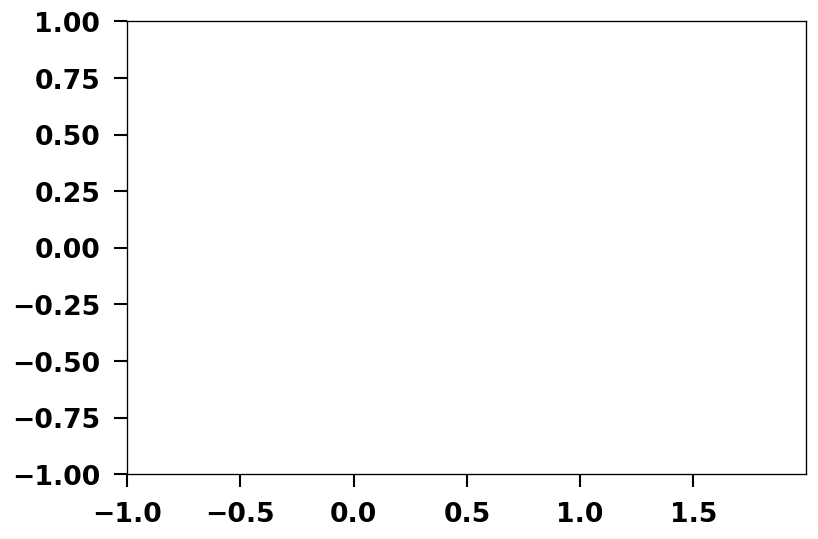

In [60]:
anim = ThreeBodyAnimation(*x,*y,mass)

In [61]:
anim.run()

/Users/tjwilli/google_drive/course_materials/phys_4220/private/python/animate3B.py:130: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  self.__ax1.set_ylim(1.1 * ymin, 1.1 * ymax)


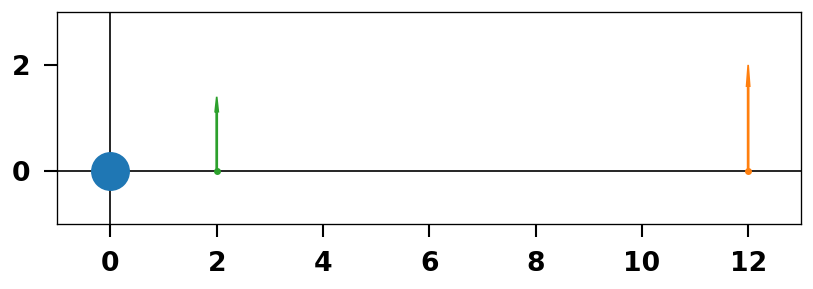

In [35]:
mass = [1000,1,1]
x0 = [0,12,2]
y0 = [0,0,0]
vx0 = [0,0,0]
vy0 = [0,2,1.4]
plot_initial_conditions()

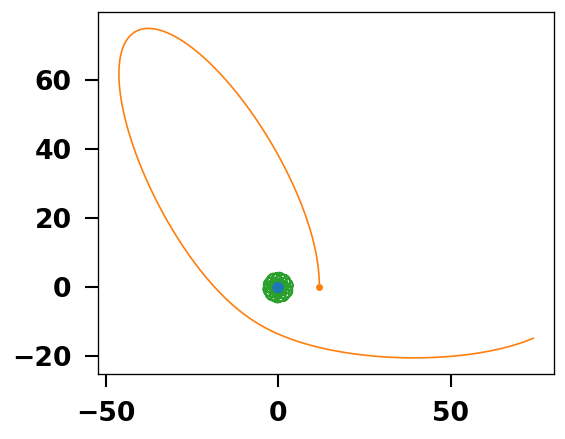

In [36]:
vx,vy,x,y = three_body(x0,y0,vx0,vy0,mass,tstop=300,dt=0.01)
xCM = (x[0] * mass[0] + x[1] * mass[1] + x[2] * mass[2]) / sum(mass)
yCM = (y[0] * mass[0] + y[1] * mass[1] + y[2] * mass[2]) / sum(mass)
mmass = np.array(mass) / sum(mass)
sizemin = 10
size = 50 * mmass
size[size <sizemin] = sizemin
plt.scatter(x[0][0]-xCM[0],y[0][0]-yCM[0],size[0])
plt.plot(x[0]-xCM,y[0]-yCM)
plt.scatter(x[1][0]-xCM[0],y[1][0]-yCM[0],size[1])
plt.plot(x[1]-xCM,y[1]-yCM)
#plt.scatter(x[2][0]-xCM[0],y[2][0]-yCM[0],size[2])
plt.plot(x[2]-xCM,y[2]-yCM)
plt.gca().set_aspect('equal')